In [1]:
# Εγκατάσταση των βιβλιοθηκών numpy (για αριθμητικούς υπολογισμούς), pandas (για επεξεργασία δεδομένων),
# matplotlib και seaborn (για οπτικοποίηση δεδομένων), scikit-learn (για machine learning) και torch (για deep learning)
# Οι βιβλιοθήκες είναι ήδη εγκατεστημένες στο περιβάλλον και δεν χρειάζεται να τις ξαναεγκαταστήσουμε.
# Αν κάποιος τρέξει το notebook σε νέο περιβάλλον, θα χρειαστεί να εκτελέσει την εξής εντολή για να εγκαταστήσει τις βιβλιοθήκες:
# !pip install numpy pandas matplotlib seaborn scikit-learn torch

In [3]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import numpy as np # για αριθμητικούς υπολογισμούς
import matplotlib.pyplot as plt # για οπτικοποίηση δεδομένων
from sklearn.preprocessing import StandardScaler # για κανονικοποίηση δεδομένων
from sklearn.manifold import TSNE # για μείωση διαστάσεων

In [4]:
# Φορτώνουμε τα δεδομένα από το αρχείο που αποθηκεύσαμε

data = np.load('train_test_images_normalized_images.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
class_names = data['class_names']  # Φόρτωση των ονομάτων των κατηγοριών

# Εκτύπωση των σχημάτων και των ονομάτων των κατηγοριών
print(f"Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: {X_train.shape}, ετικέτες: {y_train.shape}")
print(f"Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: {X_test.shape}, ετικέτες: {y_test.shape}")
print(f"Ονόματα Κατηγοριών: {class_names}")

Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: (2800, 4096), ετικέτες: (2800,)
Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: (1200, 4096), ετικέτες: (1200,)
Ονόματα Κατηγοριών: ['BreastMRI' 'ChestCT' 'CXR' 'Hand']



Shapes after flattening:
X_train_flat shape: (2800, 4096)

t-SNE output shapes:
X_train_tsne shape: (2800, 2)


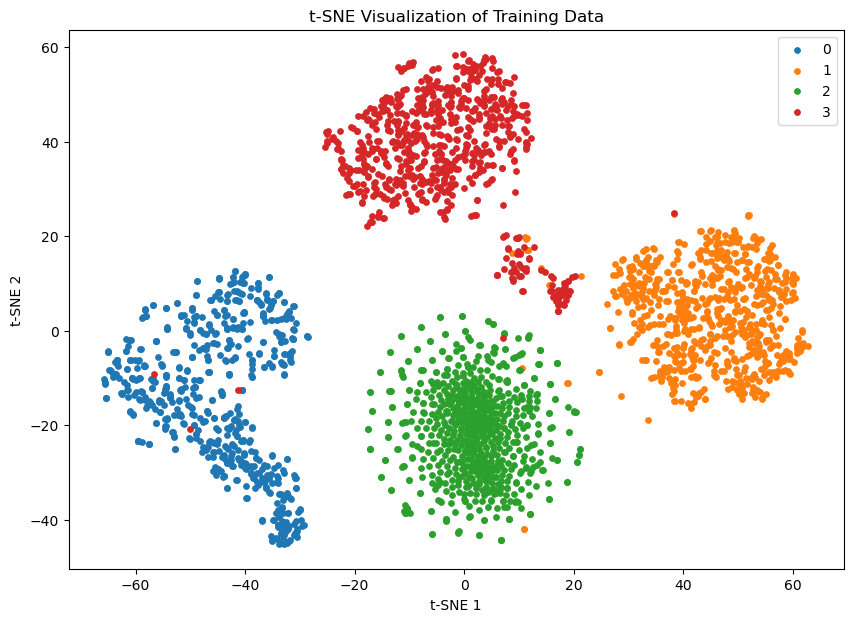

In [7]:
# Εφαρμογή Flattening στα δεδομένα
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Εκτύπωση σχήματος μετά το flattening
print("\nShapes after flattening:")
print(f"X_train_flat shape: {X_train_flat.shape}")

# Εφαρμογή Standardization (τυποποίηση) στα δεδομένα
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flat)

# Εφαρμογή t-SNE στο Training Set (2D)
tsne_train = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_train_tsne = tsne_train.fit_transform(X_train_standardized)

# Εκτύπωση σχήματος μετά το t-SNE
print("\nt-SNE output shapes:")
print(f"X_train_tsne shape: {X_train_tsne.shape}")

# Οπτικοποίηση του αποτελέσματος του t-SNE για το Training Set
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)
    plt.scatter(X_train_tsne[idx, 0], X_train_tsne[idx, 1], label=class_label, s=15)
plt.title("t-SNE Visualization of Training Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()